In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split

In [64]:
df = pd.read_csv("mammograph.csv",skipinitialspace=True)
df["label"] = df.Severity
df = df.drop("Severity", axis=1)
df = df.drop("BI-RADS_assessment", axis=1) #Removed -- Non predictive

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names
df.columns = df.columns.str.strip()
df.shape

(961, 5)

In [65]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.4)

In [66]:
tic=timeit.default_timer()
tree = decision_tree_algorithm(train_df, max_depth=2)
y_pred = decision_tree_predictions(test_df,tree)
toc=timeit.default_timer()
print(accuracy_score(test_df.label,y_pred))
print(toc - tic)



0.796875
0.09385913899996012
{'Margin = 1': [{'Age = 71': [1, 0]}, {'Shape = 4': [1, 0]}]}


In [67]:
tic=timeit.default_timer()
accuracies = []
f1score = []
error = []
for i in range(1,21):
    tree = decision_tree_algorithm(train_df, max_depth=i)
    y_pred = decision_tree_predictions(test_df,tree)
    accuracies.append(accuracy_score(test_df.label,y_pred))
    f1score.append(f1_score(test_df.label,y_pred,average='macro'))
    error.append(1-accuracy_score(test_df.label,y_pred))
toc=timeit.default_timer()
print(toc - tic)

6.663156597999659


In [68]:
index_accuracies = np.arange(1,21)
column_name=["Accuracies","f1score","Error"]
df_result = pd.DataFrame({'Accuracies':accuracies, 'f1score':f1score,'Error':error})


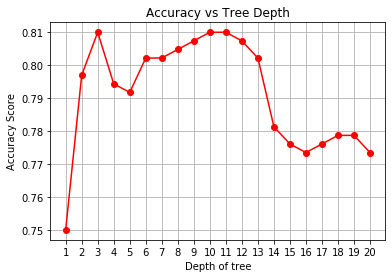

In [70]:
#sns.distplot(x=range(1,21),y=df_accuracies['Accuracies'], bins = 20)
x=range(1,21)
#x=[5,10,15,20]
plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Tree Depth')
plt.grid(True)
plt.xticks(x)
plt.show()

In [ ]:
plt.plot(x,df_result["f1score"],'r',marker='o') # 'r' is the color red
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('F1score(macro) vs Tree Depth')
plt.grid(True)
plt.xticks(x)
plt.show()


plt.plot(x,df_result["Error"],'r',marker='o') # 'r' is the color red
plt.xlabel('Depth of tree')
plt.ylabel('Error')
plt.title('Error vs Tree Depth')
plt.grid(True)
plt.xticks(x)
plt.show()